<a href="https://colab.research.google.com/github/princealexanderm/ICT_DAS_Prince_Alex/blob/main/ICT_internship_employee_salary_prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICT Internship-Employee Salary Prediction

## Project Overview
During this 4-week internship, the intern will analyze and model a dataset related to employee salary and job attributes, including factors like job title, job category, experience level, and work setting. The primary goal is to derive insights from this data and build a machine learning model to predict salary ranges. By the end of the internship, the intern will
have deployed a Flask-based web application that enables users to input data and receive a salary prediction based on their parameters.

---

## Dataset Description
The dataset( click here ) includes columns such as:
- work_year: Year of the data record
- job_title: Title of the job position
- job_category: Category of the job position
- salary_currency: Currency of the salary
- salary: Salary in the local currency
- salary_in_usd: Salary in USD
- employee_residence: Location of the employee’s residence
- experience_level: Experience level of the employee (e.g., MI, SE, CT)
- employment_type: Type of employment (e.g., full-time, contract)
- work_setting: The work setting (e.g., remote, in-office)
- company_location: Location of the company
- company_size: Size of the company (e.g., S, M, L)

## Goals and Weekly Plan
### Week 1: Data Understanding, Cleaning, and EDA

**Goal:** Familiarize with the dataset, clean and preprocess the data, and perform exploratory data analysis (EDA) to understand patterns and relationships.
1. Data Loading and Inspection:
   - Load the dataset, examine columns, data types, and identify any missing or inconsistent values.
   - Convert data types where necessary (e.g., dates, categorical encoding).
2. Data Cleaning:
   - Handle missing values through imputation or removal.
   - Standardize categorical values.
   - Ensure all salary values are in USD for consistency in analysis.
3. Exploratory Data Analysis (EDA):
   - Generate descriptive statistics.
   - Plot distribution of salaries by job_category, experience_level, work_setting, and company_size.
4. Documentation:
   - Summarize insights and challenges from the data cleaning and EDA phases.

## Week 2: Feature Engineering and Model Selection
**Goal:** Create new features to improve predictive power, select relevant features, and explore initial model types for predicting salaries.
1. Feature Engineering:
   - Create additional features to improve model accuracy.
2. Feature Selection:
   - Use correlation analysis, feature importance, and variance analysis to identify key features.
3. Model Selection and Testing:
   - Start with a few basic regression models.
4. Initial Evaluation:
   - Document findings for chosen models.

## Week 3: Model Optimization and Flask App Development
**Goal:** Improve model accuracy through hyperparameter tuning and begin building a Flask
web application.
1. Model Tuning:
   - Perform hyperparameter tuning on selected models.
2. Flask Application Development - Backend:
   - Set up a Flask app structure and integrate the final model.
3. Testing:
   - Test the Flask app locally.
4. Documentation:
   - Document the model selection, tuning process, and initial Flask app architecture.

## Week 4: Finalizing Flask App, UI Development, and Deployment
**Goal:** Complete the web application with a user-friendly interface, deploy it, and create final
documentation.
1. Flask Application Development - Frontend:
   - Design a web interface for user input.
2. Integration and Testing:
   - Connect frontend to Flask backend and perform end-to-end testing.
3.Deployment:
  - Deploy the application using a platform like Pythonanywhere.
4. Final Documentation and Presentation:
   - Compile a final report and prepare a demo.
   
## Expected Outcomes
By the end of the internship, the intern will have:
   - Developed a complete pipeline for analyzing, processing, and predicting salary data.
   - Created a deployed Flask application that predicts salaries based on user inputs.
   - Documented each phase and delivered a presentation demonstrating the project workflow and final application.

---

# Week-1

#1.1 importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2 Loading data set

In [2]:
df=pd.read_csv('/content/dsa_job - data_science_job.csv')
df.sample(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
1622,2020,Machine Learning Engineer,Data Science,GBP,118232,56823,IN,SE,PT,Remote,IN,S
1720,2020,Statistician,ML/AI,INR,128844,95526,IN,EN,FL,Hybrid,CN,M
97,2022,Machine Learning Engineer in office,Engineering,EUR,189574,103072,IN,EN,FT,In-person,UK,M
2321,2022,Machine Learning Engineer in office,ML/AI,GBP,142000,141902,DE,EN,PT,Hybrid,UK,S
3270,2020,Statistician,Analysis,us dolars,117091,53074,US,MI,FT,Remote,CN,S
2392,2021,Data Engineer in office,Analysis,INR,98917,159611,CN,SE,FL,Remote,DE,M
4911,2020,Data Analyst (Remote),Engineering,INR,151097,118356,MX,MI,FL,In-person,MX,M
2156,2022,Data Analyst (Remote),Data Science,INR,145428,48064,DE,EX,FL,Remote,IN,M
1985,2022,Machine Learning Engineer in office,Data Science,INR,133578,38338,JP,EX,FL,Hybrid,UK,L
732,2021,Data Analyst in office,Engineering,JPY,87103,176284,US,EX,PT,Hybrid,JP,M


- Some 'salary' column contains -ve sign infront of the number

# 1.3 Shape of the data set

In [3]:
df.shape

(5000, 12)

5000 rows and 12 columns

# 1.4 Summary statistics of the DataFrame

In [4]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


#1.5 Summary of the DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


out of the 12 rows, only 3 is numerical type, 9 are object type

1. work_year
2. salary
3. salary_in_usd

are numerical datas

#1.6 Identify and count missing values in each column of a DataFrame

In [6]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


4 columns contains missing values

#1.7 Access the column labels of a DataFrame

In [7]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

#1.8 Return unique values in object type column of the dataframe

In [8]:
df.nunique()

,0
work_year,3
job_title,15
job_category,4
salary_currency,5
salary,4943
salary_in_usd,4927
employee_residence,7
experience_level,4
employment_type,4
work_setting,3


### 1.8.1 Unique values in year

In [9]:
df['work_year'].unique()

array([2022, 2020, 2021])

### 1.8.2 Unique values in job_title

In [10]:
df['job_title'].unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer', 'Data Analyst  in office',
       'Statistician', 'Data Scientist  (Remote)', 'Data Analyst',
       'Data Engineer  in office', 'Data Scientist',
       'Machine Learning Engineer  (Remote)', 'Data Engineer',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

###1.8.3 Unique values in job_category

In [11]:
df['job_category'].unique()

array(['Analysis', 'ML/AI', 'Data Science', 'Engineering', nan],
      dtype=object)

### 1.8.4 Unique values in salary_currency

In [12]:
df['salary_currency'].unique()

array(['EUR', 'JPY', 'INR', nan, 'us dolars', 'GBP'], dtype=object)

### 1.8.5 Unique values in employee residence

In [13]:
df['employee_residence'].unique()

array(['US', 'JP', 'UK', 'DE', 'CN', 'MX', 'IN'], dtype=object)

USA, Japan, UK, Germany (DE), China (CN), Mexico (MX), India (IN)

### 1.8.6 Unique values in experience leve

In [14]:
df['experience_level'].unique()

array(['MI', 'EX', 'SE', nan, 'EN'], dtype=object)

MI (mid level), Senior Level (SE), Entry Level (EN),

### 1.8.7 Unique values in employement type

In [15]:
df['employment_type'].unique()

array(['CT', 'FL', 'FT', 'PT'], dtype=object)

Full time (FT), Part time (PT), Contract (CT),

### 1.8.8. Unique values in work_setting

In [16]:
df['work_setting'].unique()

array(['Remote', 'Hybrid', 'In-person'], dtype=object)

###1.8.9 Unique values in company location

In [17]:
df['company_location'].unique()

array(['DE', 'IN', 'CN', 'MX', 'UK', 'JP', 'US'], dtype=object)

### 1.8.10 Unique values in company size

In [18]:
df['company_size'].unique()

array(['L', 'M', 'S', nan], dtype=object)

# 1.9 Identify and count the number of duplicate rows in the data frame

In [19]:
df.duplicated().sum()

0

#1.10 Histogram of numerical type data type

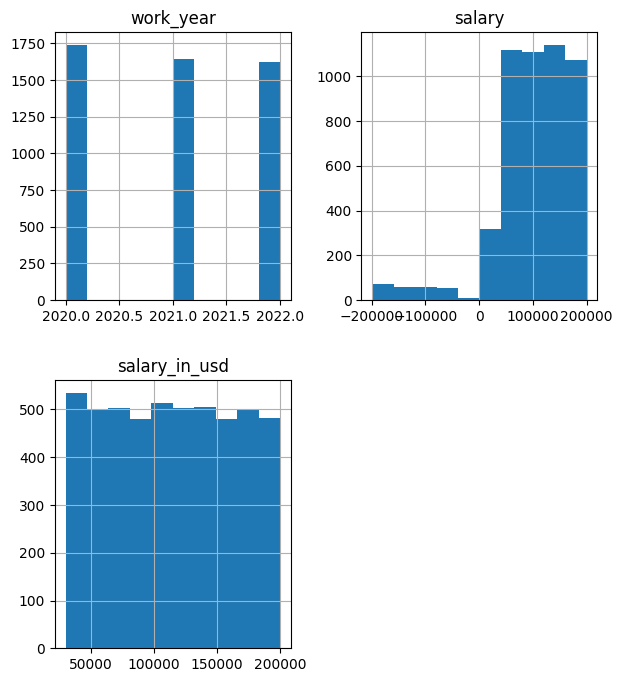

In [20]:
df.hist(figsize=(7,8))
plt.show()

salary's are shown in negative

#1.11 Outlier checking

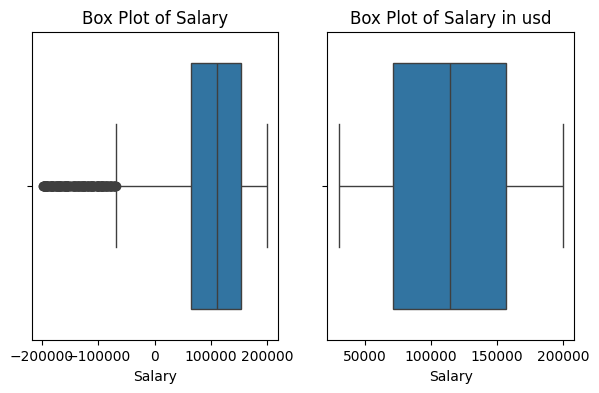

In [21]:
plt.figure(figsize=(7, 4))
plt.subplot(1,2,1)
sns.boxplot(x=df['salary'])
plt.title('Box Plot of Salary')
plt.xlabel('Salary')

plt.subplot(1,2,2)
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot of Salary in usd')
plt.xlabel('Salary')
plt.show()

again salary is shown negative, probably the reason for outlier

In [22]:
df['salary']=abs(df['salary'])
df['salary']

,salary
0,186597
1,110630
2,61280
3,154130
4,172312
...,...
4995,179769
4996,184642
4997,135319
4998,58037


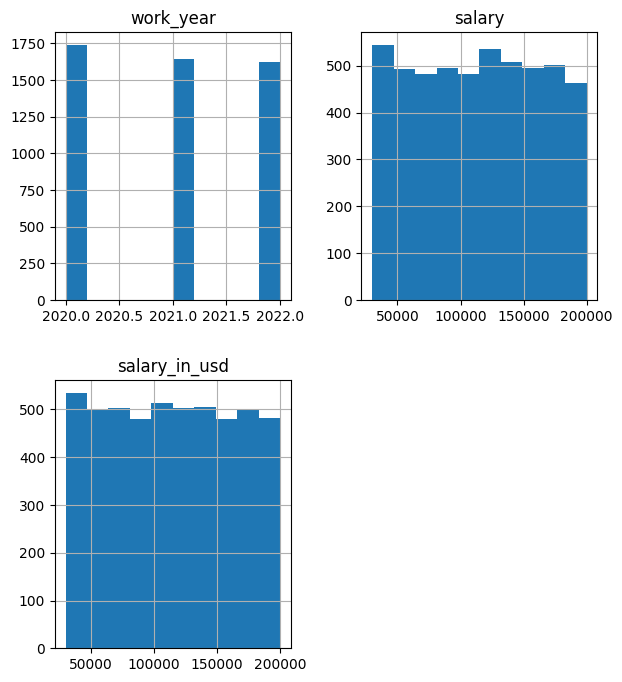

In [23]:
df.hist(figsize=(7,8))
plt.show()

<Axes: >

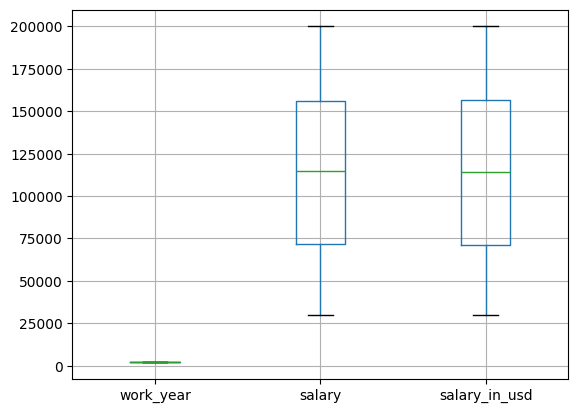

In [24]:
df.boxplot()

salary issue is fixed

<Axes: xlabel='job_category'>

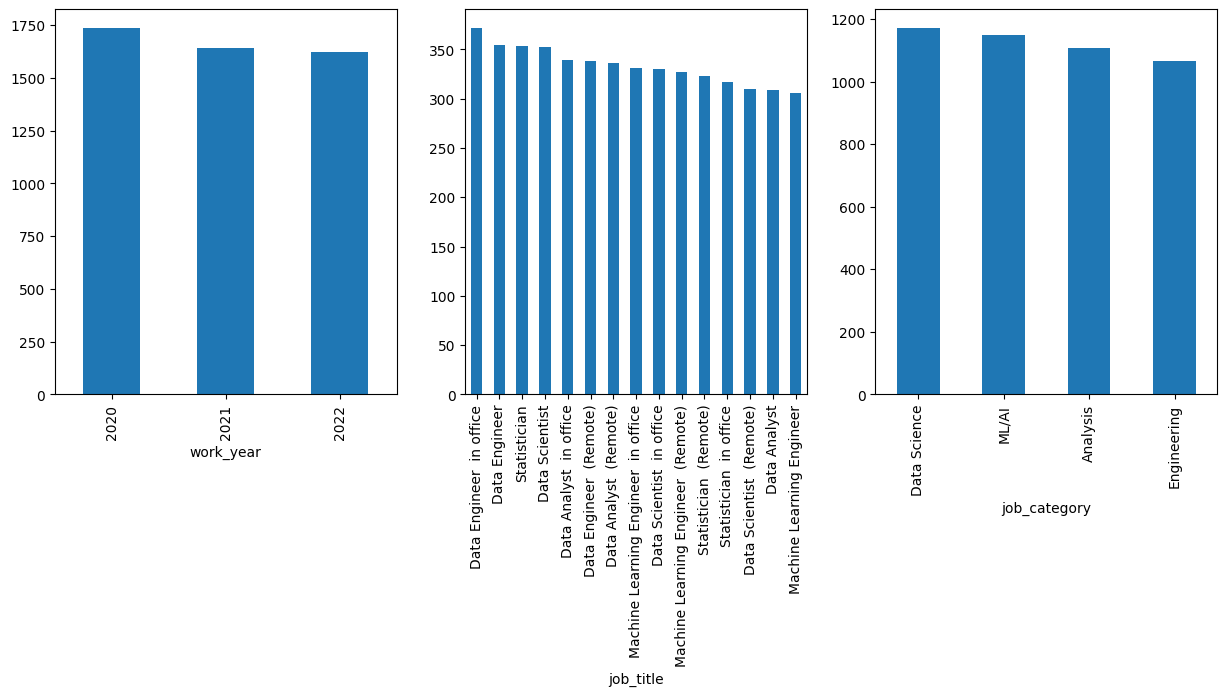

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df['work_year'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df['job_title'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df['job_category'].value_counts().plot(kind='bar')

<Axes: xlabel='salary_in_usd'>

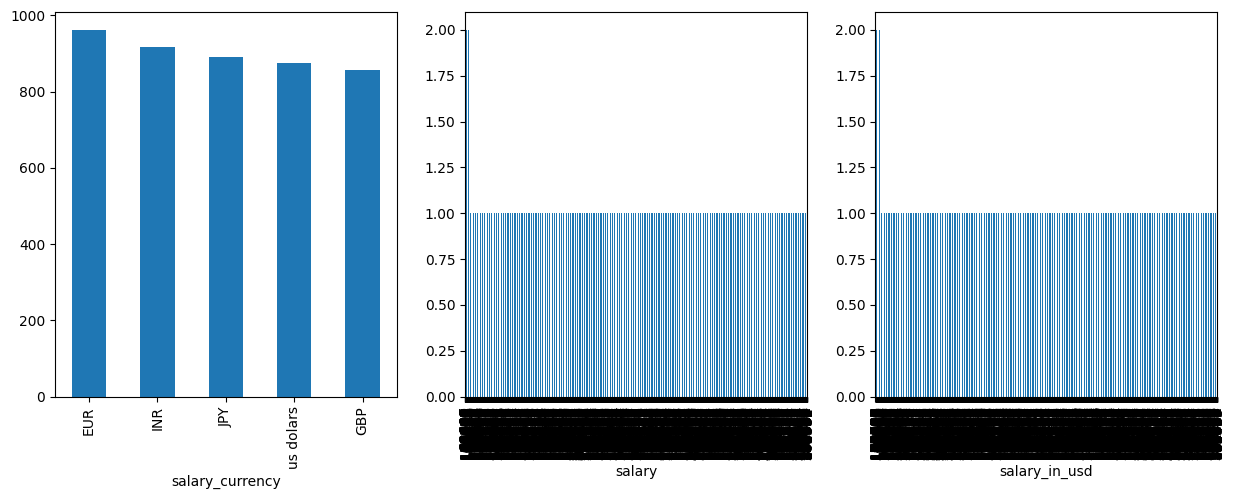

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df['salary_currency'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df['salary'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df['salary_in_usd'].value_counts().plot(kind='bar')

In [27]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

<Axes: xlabel='employment_type'>

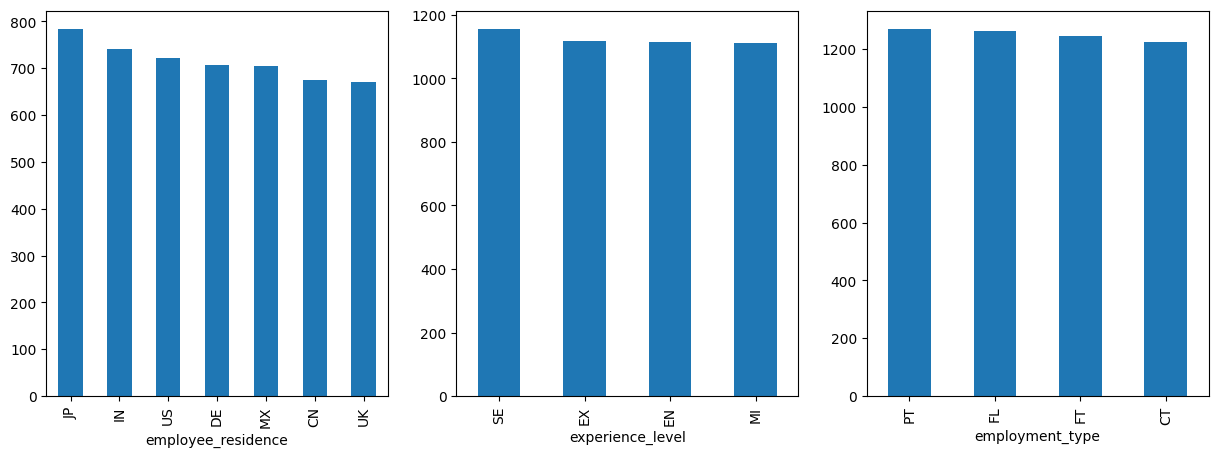

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df['employee_residence'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df['experience_level'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df['employment_type'].value_counts().plot(kind='bar')

<Axes: xlabel='company_size'>

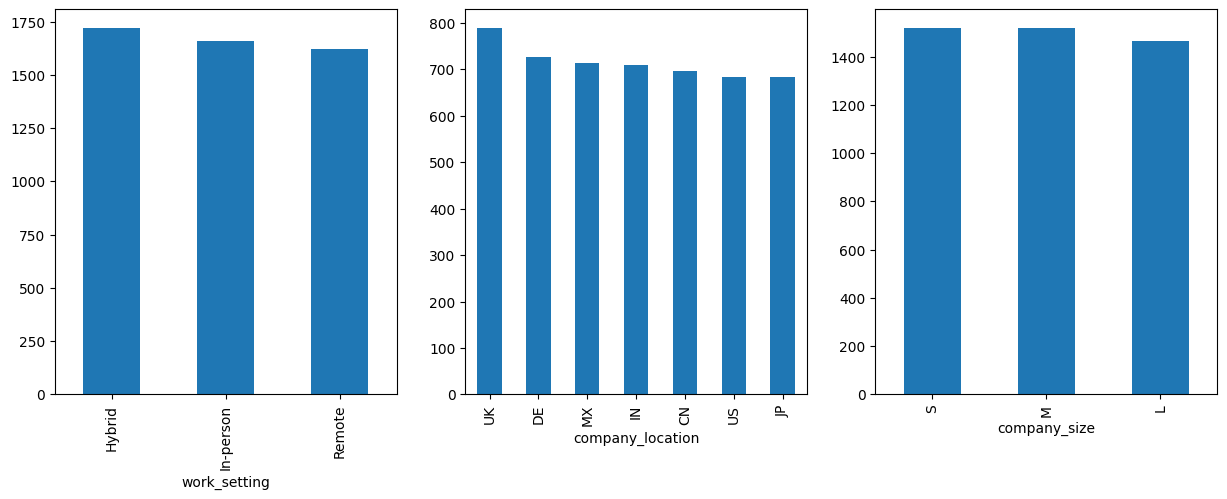

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
df['work_setting'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
df['company_location'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
df['company_size'].value_counts().plot(kind='bar')

#1.12 Univariate analysis

In [30]:
columns=df.columns
columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

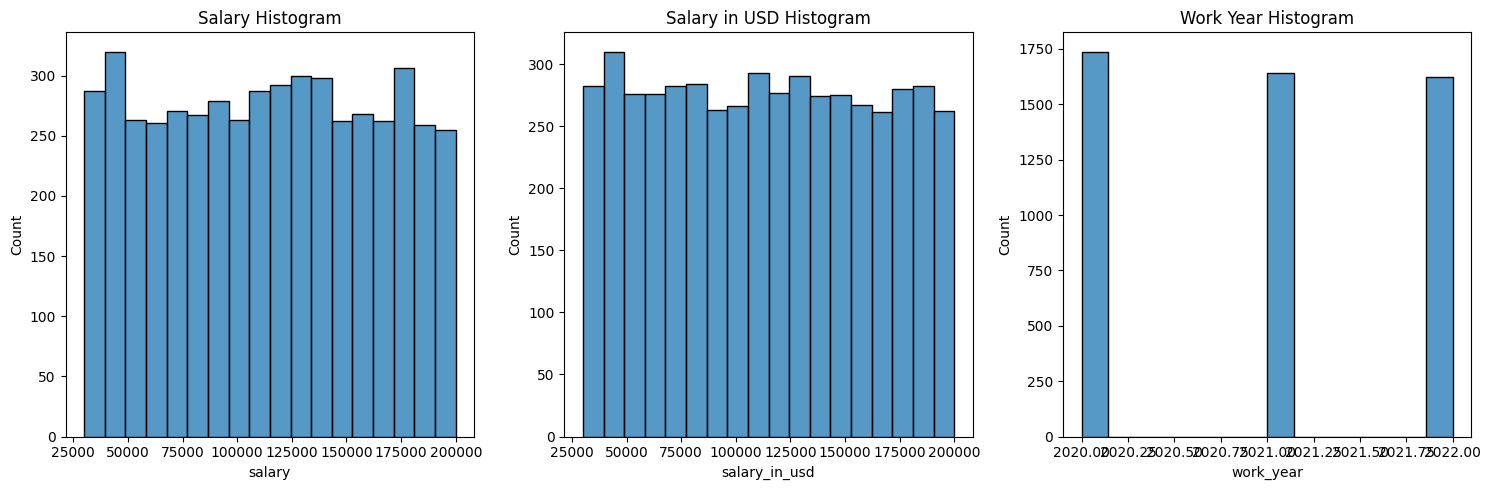

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Assuming 'salary', 'salary_in_usd', and 'work_year' are your numerical columns
sns.histplot(df['salary'], ax=axes[0])
axes[0].set_title('Salary Histogram')

sns.histplot(df['salary_in_usd'], ax=axes[1])
axes[1].set_title('Salary in USD Histogram')

sns.histplot(df['work_year'], ax=axes[2])
axes[2].set_title('Work Year Histogram')

plt.tight_layout()
plt.show()

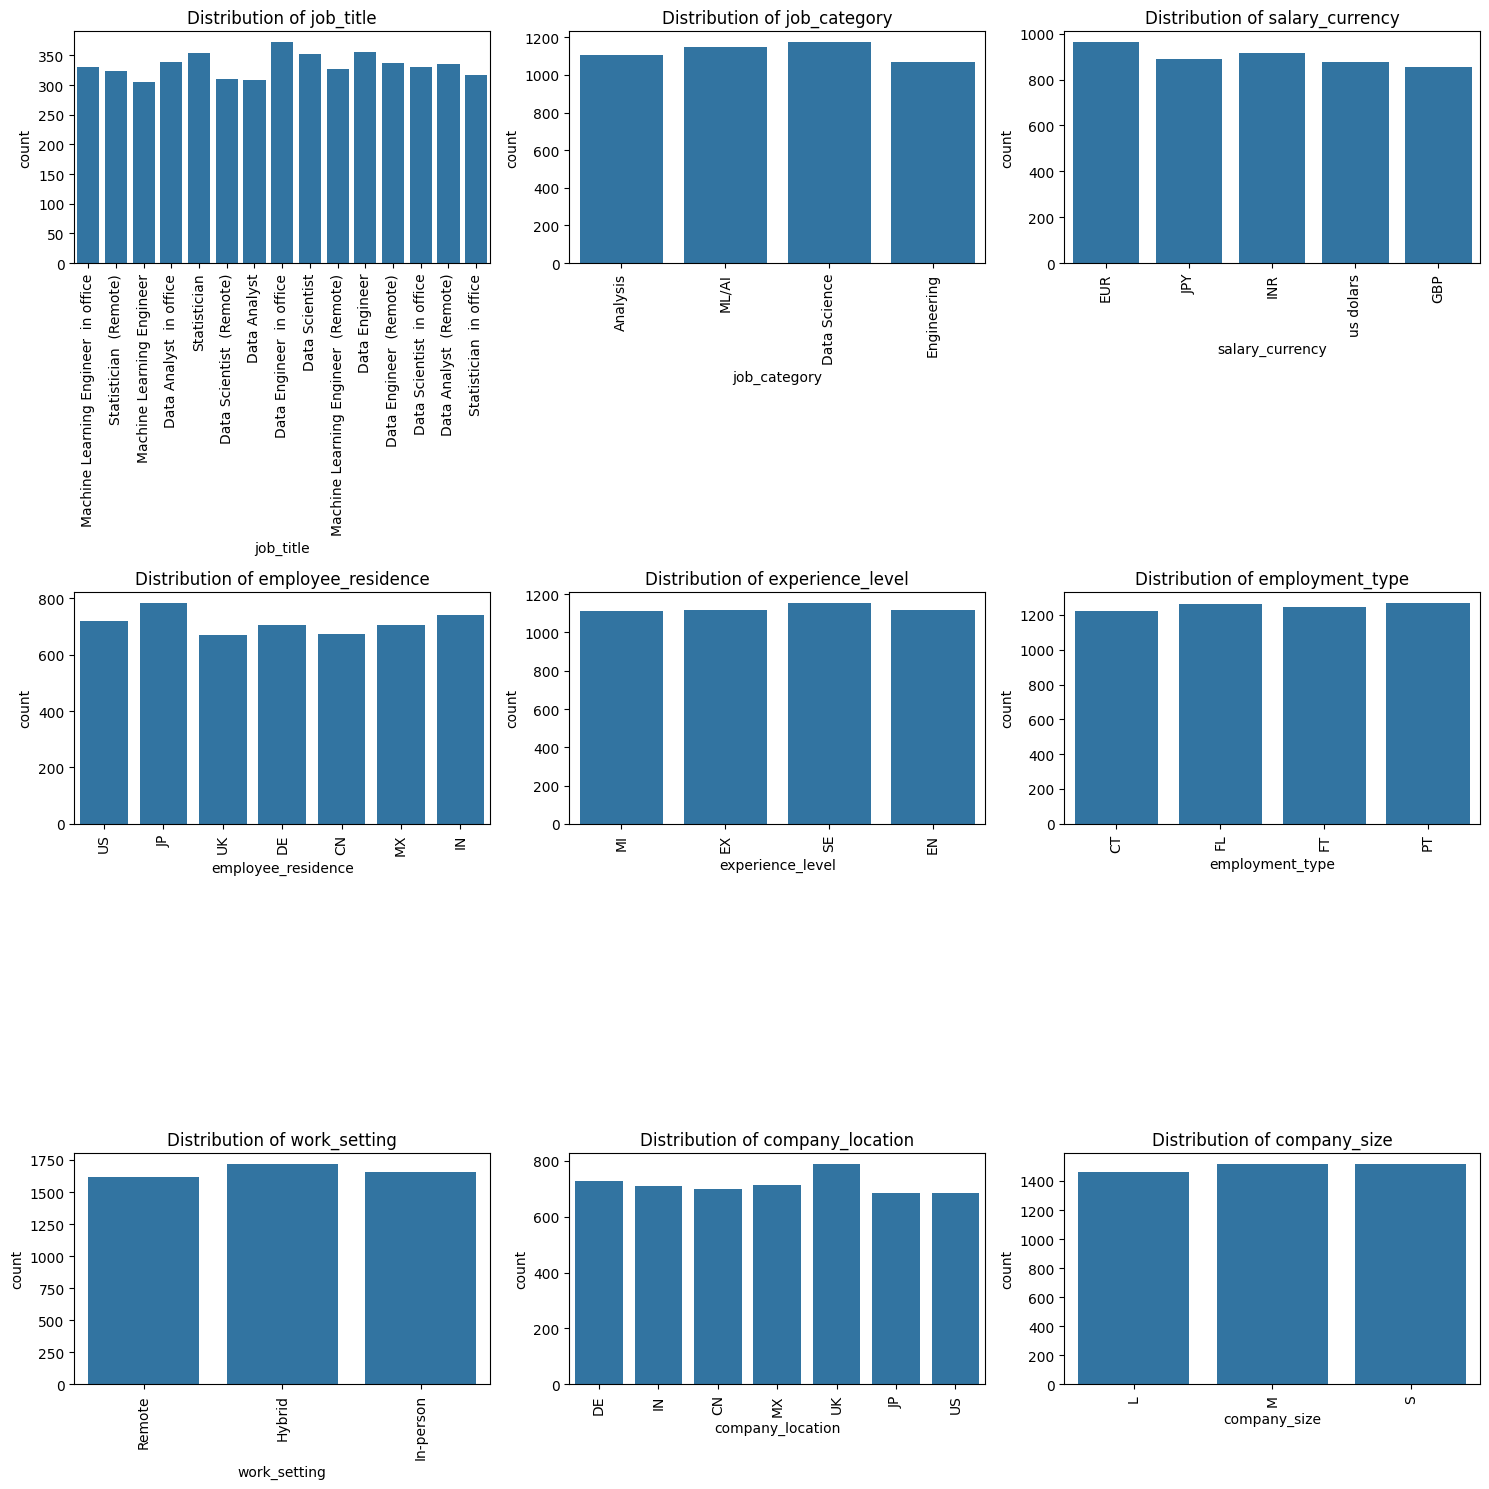

In [32]:
import matplotlib.pyplot as plt

categorical_features = ['job_title', 'job_category', 'salary_currency',
                        'employee_residence', 'experience_level',
                        'employment_type', 'work_setting', 'company_location',
                        'company_size']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(categorical_features):
  row = i // 3
  col = i % 3
  sns.countplot(x=feature, data=df, ax=axes[row, col])
  axes[row, col].set_title(f'Distribution of {feature}')
  axes[row, col].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#1.13 Bivariate analysis with 'salary' as target variable

In [33]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

<Axes: xlabel='job_category', ylabel='salary'>

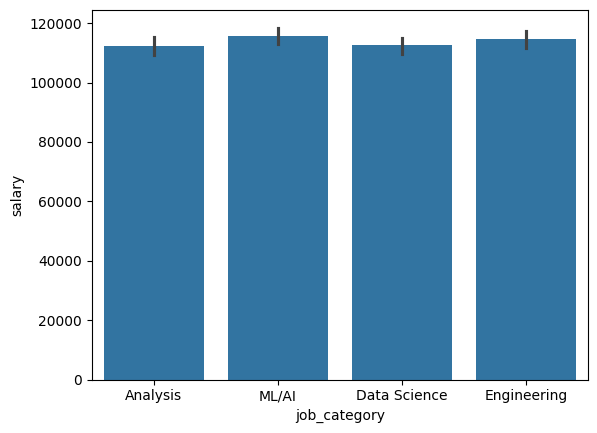

In [34]:
sns.barplot(x=df['job_category'],y=df['salary'])

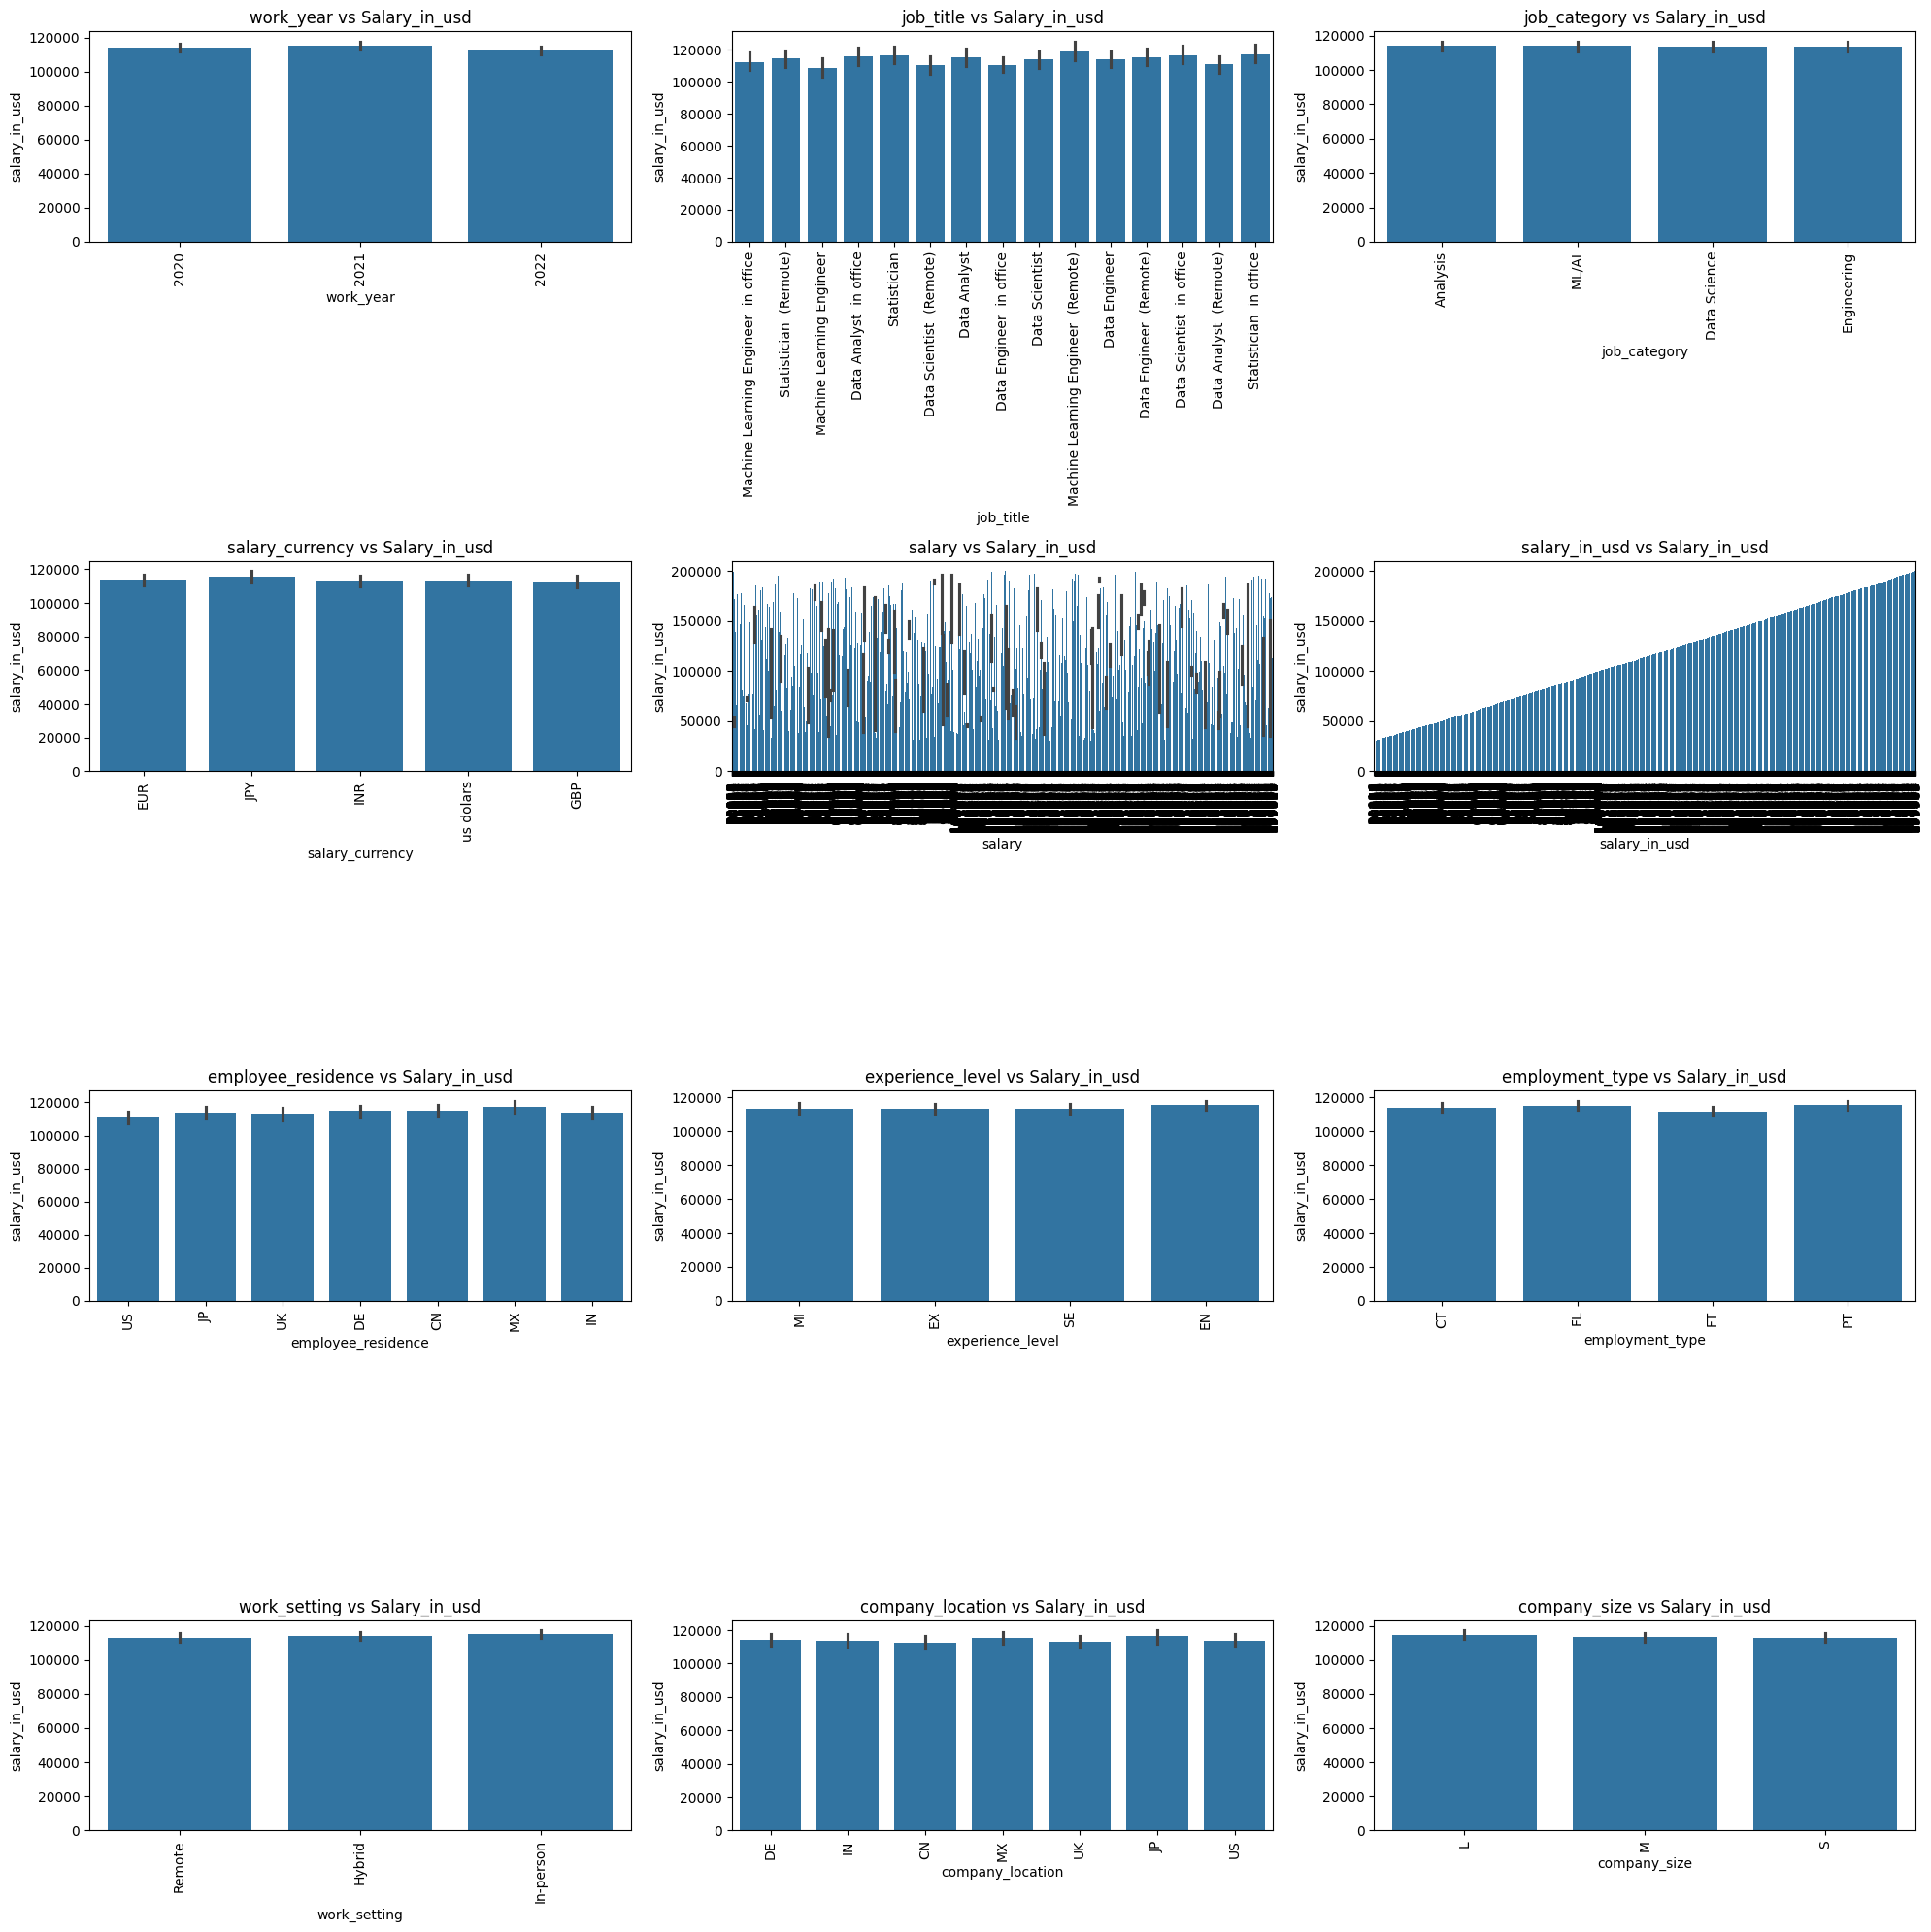

In [35]:
# Assuming 'df' is your DataFrame and 'salary' is the column name for salary

# List of columns to plot against salary
columns_to_plot = columns

# Create a figure and axes with 3 rows and 4 columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
  # Create a barplot for each column against 'salary'
  sns.barplot(x=column, y='salary_in_usd', data=df, ax=axes[i])
  axes[i].set_title(f'{column} vs Salary_in_usd')
  axes[i].tick_params(axis='x', rotation=90)

# Remove any unused axes
for i in range(len(columns_to_plot), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

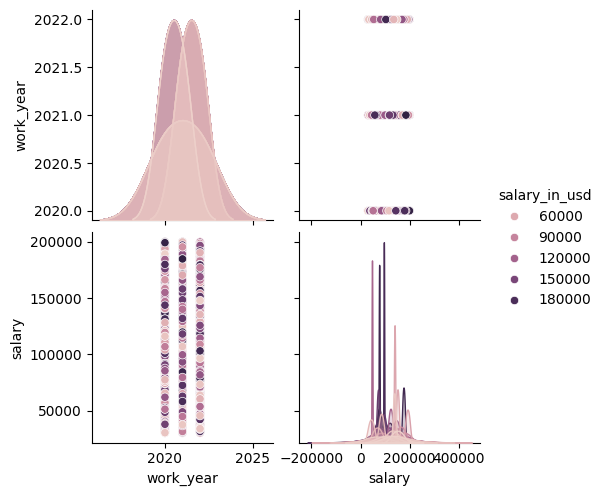

In [36]:
sns.pairplot(df,hue='salary_in_usd',diag_kind='kde')

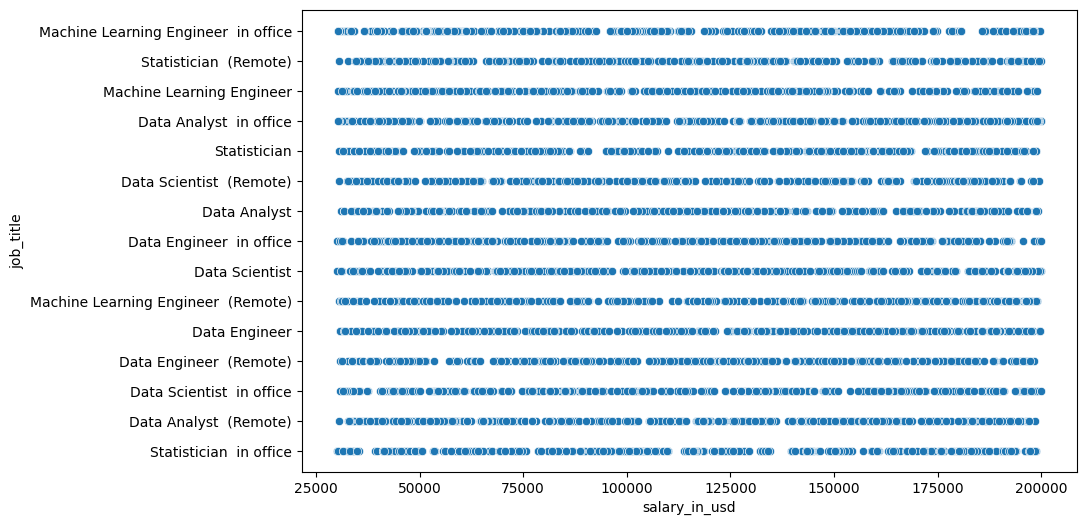

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary_in_usd', y='job_title', data=df)
plt.show()

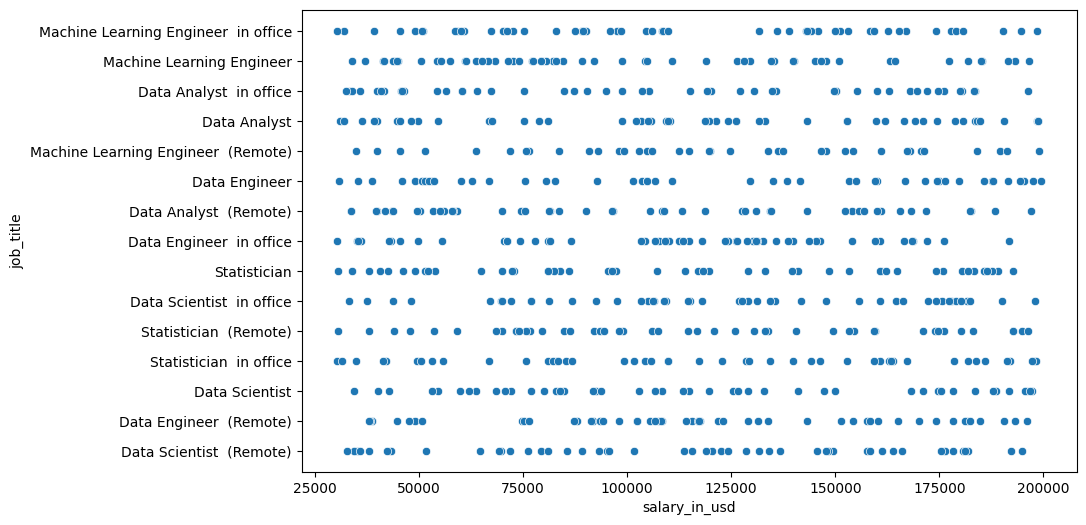

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary_in_usd', y='job_title', data=df[df['company_location'] == 'DE'])
plt.show()

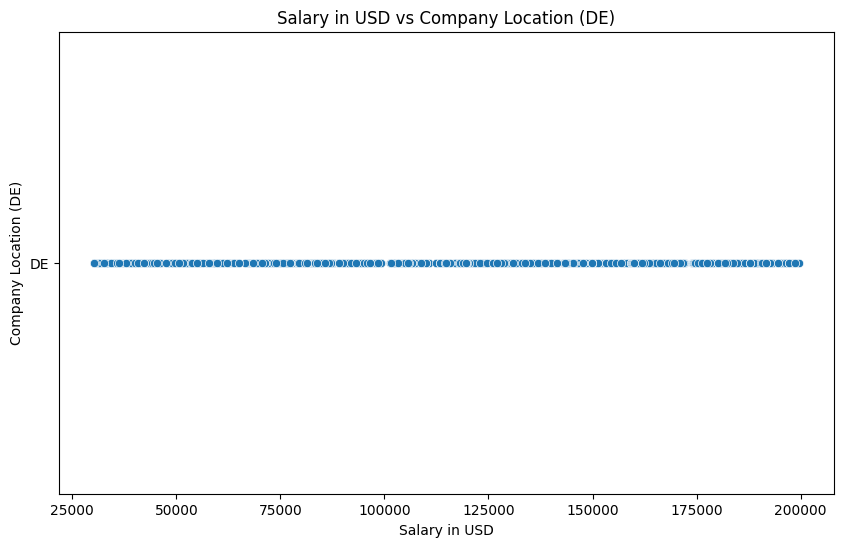

In [39]:
# prompt: plot company location 'DE' against salary_in_usd

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary_in_usd', y='company_location', data=df[df['company_location'] == 'DE'])
plt.xlabel('Salary in USD')
plt.ylabel('Company Location (DE)')
plt.title('Salary in USD vs Company Location (DE)')
plt.show()

In [40]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,114201.052800,114076.995800
std,0.81951,48900.704986,49113.807687
min,2020.00000,30018.000000,30016.000000
25%,2020.00000,71946.500000,71343.750000
50%,2021.00000,115008.500000,114167.000000
75%,2022.00000,155858.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


#1.14 Groupby analysis

In [90]:
df.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_ratio
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L,0.729304
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M,0.614499
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L,2.501779
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L,0.877454
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S,0.204025
5,2020,Machine Learning Engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M,1.868433
6,2022,Data Analyst in office,Data Science,JPY,178404,105324,DE,EX,PT,Remote,DE,L,0.590368
7,2021,Data Scientist (Remote),ML/AI,JPY,187908,90706,UK,EX,CT,Remote,JP,M,0.482715
8,2022,Data Analyst,Data Science,EUR,44388,171043,UK,SE,FL,In-person,DE,S,3.853361
9,2022,Statistician (Remote),Engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S,2.316148


In [95]:
df['job_title'].unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer', 'Data Analyst  in office',
       'Statistician', 'Data Scientist  (Remote)', 'Data Analyst',
       'Data Engineer  in office', 'Data Scientist',
       'Machine Learning Engineer  (Remote)', 'Data Engineer',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

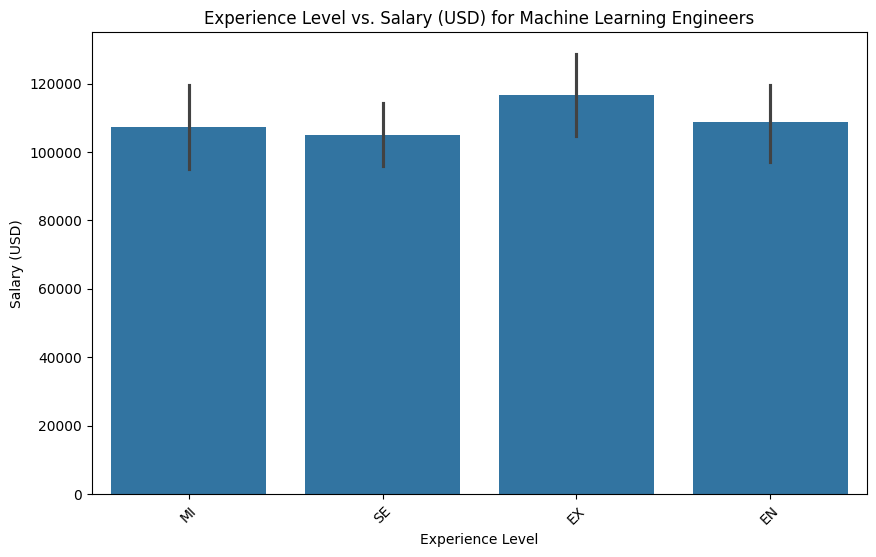

In [93]:
# prompt: in job_title (machine learning engineer), plot experiene_level vs salary in usd

import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 'Machine Learning Engineer' job titles
machine_learning_engineers = df[df['job_title'] == 'Machine Learning Engineer']

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=machine_learning_engineers)
plt.title('Experience Level vs. Salary (USD) for Machine Learning Engineers')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

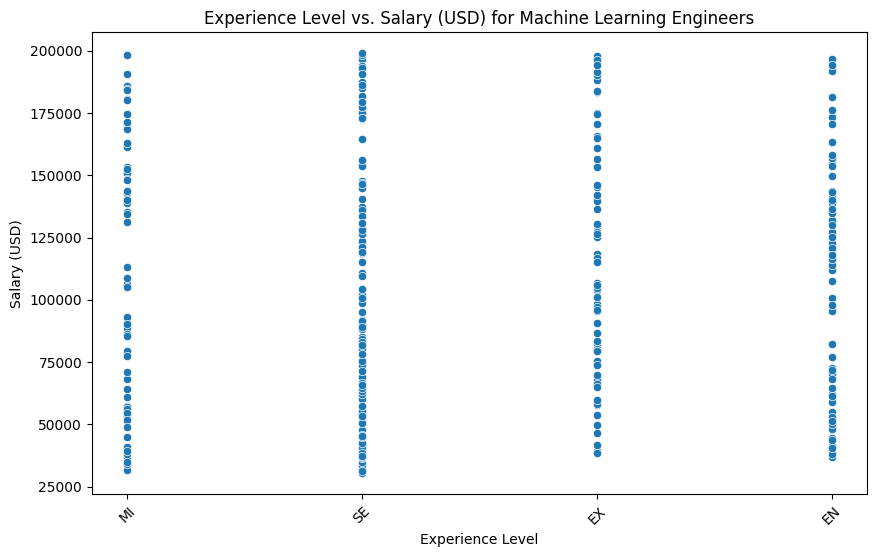

In [94]:
# prompt: in job_title (machine learning engineer), plot experiene_level vs salary in usd scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded as shown in the provided code.

# Filter for 'Machine Learning Engineer' job titles
machine_learning_engineers = df[df['job_title'] == 'Machine Learning Engineer']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience_level', y='salary_in_usd', data=machine_learning_engineers)
plt.title('Experience Level vs. Salary (USD) for Machine Learning Engineers')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [96]:
df['job_category'].unique()

array(['Analysis', 'ML/AI', 'Data Science', 'Engineering'], dtype=object)

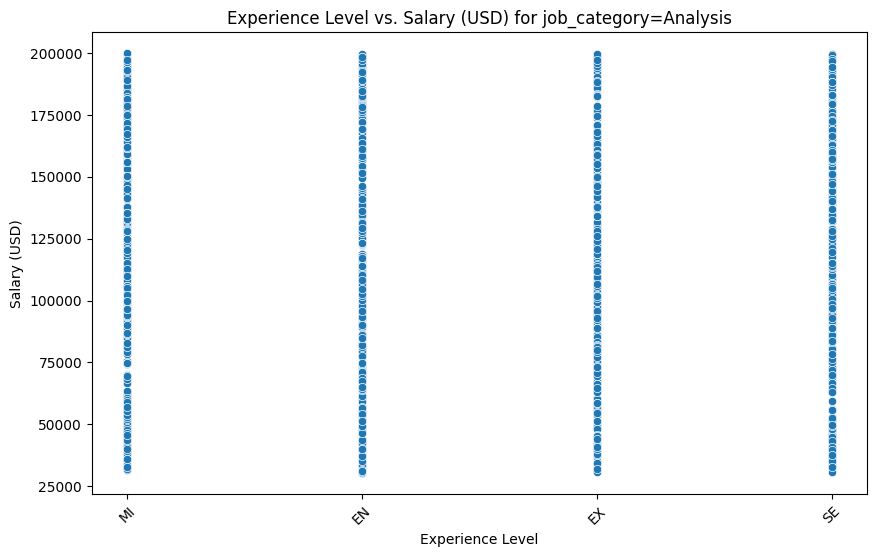

In [99]:
analysis=df[df['job_category']=='Analysis']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='experience_level', y='salary_in_usd', data=analysis)
plt.title('Experience Level vs. Salary (USD) for job_category=Analysis')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [97]:
analysis=df.groupby('job_category')['salary_in_usd'].mean()
analysis

,salary_in_usd
job_category,
Analysis,113859.608303
Data Science,114611.209803
Engineering,113639.090824
ML/AI,113916.099044


#2.1  Handling missing values

In [41]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [42]:
df.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
1133,2020,Data Engineer in office,Analysis,INR,181628,114728,US,EN,FT,Remote,UK,L
608,2022,Data Analyst (Remote),ML/AI,INR,140180,106000,DE,SE,FL,Remote,MX,M
4172,2022,Machine Learning Engineer in office,ML/AI,INR,127309,190236,DE,SE,PT,In-person,IN,M
2638,2022,Data Engineer in office,Engineering,us dolars,89596,60697,DE,EX,FT,Hybrid,US,S
4377,2021,Statistician (Remote),Analysis,JPY,189027,46411,IN,MI,CT,In-person,UK,M


In [43]:
df['salary_ratio'] =  df['salary_in_usd']/df['salary']

In [44]:
df.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_ratio
3752,2020,Data Scientist in office,NaN,NaN,185732,131266,MX,NaN,FL,In-person,MX,NaN,0.706750
2312,2021,Data Engineer,NaN,NaN,30744,171628,DE,NaN,FT,Remote,DE,NaN,5.582488
1213,2020,Machine Learning Engineer in office,Engineering,GBP,154750,114614,UK,EN,CT,In-person,UK,M,0.740640
2784,2020,Data Analyst in office,Data Science,GBP,188554,33534,JP,MI,FT,In-person,IN,M,0.177848
4488,2021,Statistician (Remote),Engineering,GBP,42651,185863,UK,EN,CT,In-person,UK,S,4.357764


In [45]:
df[['salary_currency','salary_ratio']].sample(10)

,salary_currency,salary_ratio
4271,us dolars,1.617128
3817,INR,4.580677
340,JPY,1.722085
4389,GBP,0.592307
3425,NaN,0.851459
4476,us dolars,0.323052
353,INR,0.322454
1464,us dolars,0.523390
4578,EUR,0.515011
1523,INR,5.620579


In [46]:
df[['work_year','salary','salary_currency','salary_ratio','employee_residence','company_location']].sample(10)

,work_year,salary,salary_currency,salary_ratio,employee_residence,company_location
3400,2020,55979,EUR,1.763197,US,MX
966,2022,91684,EUR,1.338162,UK,IN
587,2020,53674,EUR,2.387786,MX,US
821,2020,139322,INR,0.549418,UK,MX
4623,2020,86632,us dolars,1.471639,MX,IN
3491,2021,160512,EUR,0.519886,JP,US
589,2021,192504,NaN,0.404345,CN,JP
1412,2021,134987,GBP,0.529473,IN,UK
3194,2021,185562,INR,1.010665,UK,IN
45,2022,115553,EUR,1.701323,US,CN


## To fill the missing values in job_category

In [47]:
df['job_category'].unique()

array(['Analysis', 'ML/AI', 'Data Science', 'Engineering', nan],
      dtype=object)

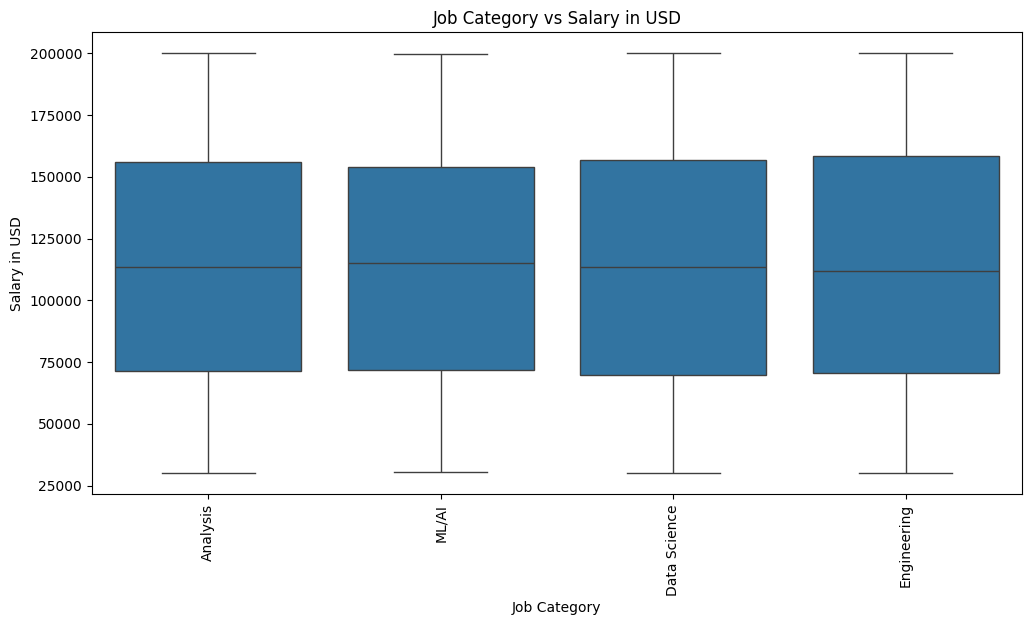

In [48]:
# prompt: plot job_category vs 'salary_in_usd'

# Assuming 'df' is your DataFrame and 'job_category' and 'salary_in_usd' are your columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt.title('Job Category vs Salary in USD')
plt.show()

In [49]:
# Find the mode for each column
job_category_mode = df['job_category'].mode()[0]
salary_currency_mode = df['salary_currency'].mode()[0]
experience_level_mode = df['experience_level'].mode()[0]
company_size_mode = df['company_size'].mode()[0]

# Fill missing values with the mode
df['job_category'].fillna(job_category_mode, inplace=True)
df['salary_currency'].fillna(salary_currency_mode, inplace=True)
df['experience_level'].fillna(experience_level_mode, inplace=True)
df['company_size'].fillna(company_size_mode, inplace=True)

<ipython-input-49-f3f4ecb31a1e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_category'].fillna(job_category_mode, inplace=True)
<ipython-input-49-f3f4ecb31a1e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [50]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


##2.1.1. Filling missing values

#2.2 Outlier Handling

There are no outliers

#2.3 Encoding

In [51]:
df.sample(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_ratio
2643,2020,Data Engineer,Engineering,EUR,180923,95550,IN,MI,CT,In-person,IN,L,0.528125
4412,2020,Data Analyst (Remote),Engineering,us dolars,68458,159094,DE,MI,CT,Hybrid,CN,S,2.323965
2069,2021,Data Analyst,ML/AI,us dolars,108254,59469,DE,MI,FT,Remote,CN,M,0.549347


In [52]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame
# Assuming 'df' is your DataFrame and you've already handled missing values

# List of categorical columns to encode
categorical_columns = ['job_title', 'job_category', 'salary_currency', 'employee_residence',
                       'experience_level', 'employment_type', 'work_setting',
                       'company_location', 'company_size']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the encoder on the categorical columns
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features)

# Get feature names from the encoder
feature_names = encoder.get_feature_names_out(categorical_columns)

# Set the column names of the encoded DataFrame
encoded_df.columns = feature_names


# Concatenate the encoded DataFrame with the original DataFrame (excluding the categorical columns)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Print the encoded DataFrame
df_encoded

,work_year,salary,salary_in_usd,salary_ratio,job_title_Data Analyst,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,...,company_location_CN,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_L,company_size_M,company_size_S
0,2022,186597,136086,0.729304,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020,110630,67982,0.614499,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2022,61280,153309,2.501779,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2022,154130,135242,0.877454,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2020,172312,35156,0.204025,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,179769,179111,0.996340,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,2021,184642,196373,1.063534,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4997,2022,135319,51366,0.379592,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4998,2021,58037,181817,3.132777,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df_encoded.shape

(5000, 56)

# Spliting in to independent and target variable

In [54]:
x=df_encoded.drop('salary_in_usd',axis=1)
y=df_encoded['salary_in_usd']

In [55]:
x.sample(3)

,work_year,salary,salary_ratio,job_title_Data Analyst,job_title_Data Analyst (Remote),job_title_Data Analyst in office,job_title_Data Engineer,job_title_Data Engineer (Remote),job_title_Data Engineer in office,job_title_Data Scientist,...,company_location_CN,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_L,company_size_M,company_size_S
1808,2021,123120,1.037719,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2796,2022,48070,3.317412,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3741,2021,116923,1.360725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
y.sample(3)

,salary_in_usd
4703,178133
2851,132341
3061,130477


#Split the data into training and testing

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
x_train.shape

(4000, 55)

In [59]:
x_test.shape

(1000, 55)

#2.4 Data Modelling and Evaluation

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Model-1: Linear Regression

In [61]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [62]:
y_pred=model.predict(x_test)

In [63]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

1024604211.999542

In [64]:
r2_value=r2_score(y_test,y_pred)
r2_value

0.5623488902574196

In [65]:
df.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_ratio
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L,0.729304
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M,0.614499
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L,2.501779
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L,0.877454
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S,0.204025


In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 1024604211.999542
R-squared: 0.5623488902574196
      Actual      Predicted
1501  125675  125266.760498
2586   63435  119934.659424
2653   33864  102116.119385
1055   89867   96493.024658
705   147253  121005.249756
106   193277  179474.168457
589    77838  127106.213867
2468   94546   89080.850342
2413  114259   91467.294678
1600   52623   99624.303711
2464   86714   78304.231201
228    36508   88367.905273
915    33567   34953.546631
794   152078  137056.029053
3021  104229  116788.120361
3543  132657  120507.148682
1073  120037  111010.323975
3351  138343  123185.804932
1744  102940  131123.348877
1084  145855  142232.167480


#Model-2: Decision Tree Regressior

In [67]:
dtr=DecisionTreeRegressor()
model2=dtr.fit(x_train,y_train)

In [68]:
y_pred2=model2.predict(x_test)

In [69]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

1024604211.999542

In [70]:
r2_value=r2_score(y_test,y_pred2)
r2_value

0.9917778679797572

In [71]:
# Assuming y_pred contains the predicted values and y_test contains the actual values
# Calculate metrics
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 19249193.963
R-squared: 0.9917778679797572
      Actual  Predicted
1501  125675   124096.0
2586   63435    61116.0
2653   33864    35156.0
1055   89867    85881.0
705   147253   150354.0
106   193277   194340.0
589    77838    78181.0
2468   94546    87392.0
2413  114259   112667.0
1600   52623    53937.0
2464   86714    89048.0
228    36508    36068.0
915    33567    31265.0
794   152078   153793.0
3021  104229   104726.0
3543  132657   133351.0
1073  120037   116639.0
3351  138343   139768.0
1744  102940    97656.0
1084  145855   144527.0


#Model-3: Random Forest Regressor

In [72]:
rfr=RandomForestRegressor()
model3=rfr.fit(x_train,y_train)

In [73]:
y_pred3=model3.predict(x_test)

In [74]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

1024604211.999542

In [75]:
r2_value=r2_score(y_test,y_pred3)
r2_value

0.9984803453737785

In [76]:
# Assuming y_pred contains the predicted values and y_test contains the actual values
# Calculate metrics
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 3557730.1100115995
R-squared: 0.9984803453737785
      Actual  Predicted
1501  125675  123028.02
2586   63435   61567.72
2653   33864   34857.09
1055   89867   91210.40
705   147253  147051.44
106   193277  192144.73
589    77838   76979.53
2468   94546   95122.11
2413  114259  115047.17
1600   52623   52782.94
2464   86714   84803.20
228    36508   37038.85
915    33567   34415.58
794   152078  154565.10
3021  104229  103726.64
3543  132657  133881.55
1073  120037  120144.12
3351  138343  139264.13
1744  102940  102764.89
1084  145855  145242.46


#Model-4: Lasso Regressor

In [77]:
from sklearn.linear_model import Lasso

In [78]:
model4 = Lasso(alpha=0.1)  # You can adjust the alpha parameter
model4.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.276e+10, tolerance: 9.716e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [79]:
y_pred4 = model4.predict(x_test)

In [80]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

1024604211.999542

In [81]:
r2_value=r2_score(y_test,y_pred4)
r2_value

0.5623552856964005

#Model-5: SVR Regressor

In [82]:
from sklearn.svm import SVR

In [83]:
model5 = SVR(kernel='linear')

In [84]:
model5.fit(x_train, y_train)

SVR(kernel='linear')

In [85]:
y_pred5 = model5.predict(x_test)

In [86]:
mse_svr = mean_squared_error(y_test, y_pred5)
r2_svr = r2_score(y_test, y_pred5)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

SVR - Mean Squared Error: 2267092437.1123486
SVR - R-squared: 0.031630448741826855


In [87]:
# prompt: apply svr regression

from sklearn.svm import SVR

# Assuming x_train, x_test, y_train, y_test are already defined from the previous code

# Initialize the SVR model
svr_model = SVR(kernel='linear') # You can experiment with different kernels (e.g., 'rbf', 'poly')

# Train the model
svr_model.fit(x_train, y_train)

# Make predictions
y_pred_svr = svr_model.predict(x_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

SVR - Mean Squared Error: 2267092437.1123486
SVR - R-squared: 0.031630448741826855


#3.1 Model Evaluation

# 3.2 Model Deployment

#**From devika's internship project**

how to do feature selection
1. correlation
2.
3. Variance inflation factor

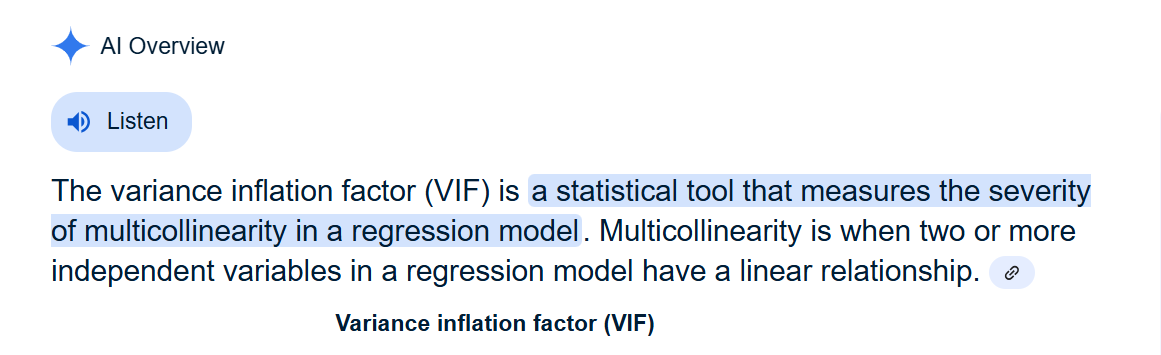

multicollinearity

feature selection

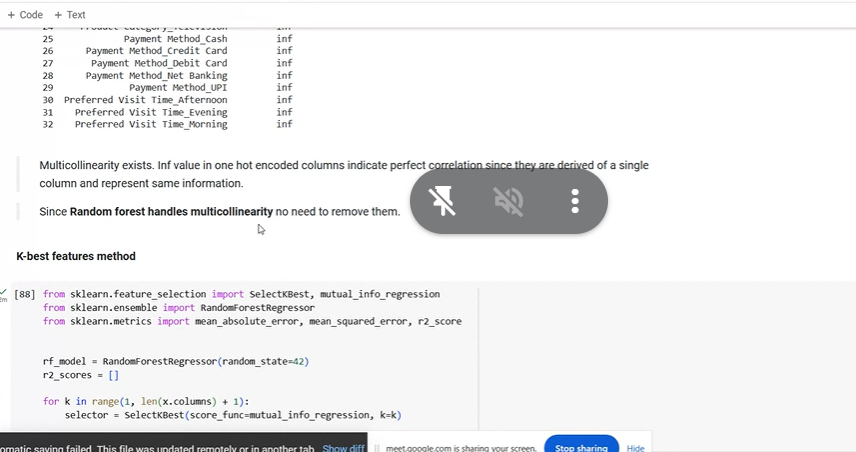